In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import requests
import json
import glob

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.20f}'.format)

In [3]:
data_path = '/root/coursework/full_data/'

In [4]:
blocks_df = pd.read_csv(data_path + 'blocks.csv')
blocks_df['timestamp'] = pd.to_datetime(blocks_df['timestamp'], unit='s')

In [5]:
cmc_df = pd.read_csv(data_path + 'cmc_snapshots.csv')
cmc_df['token_adress'] = cmc_df['token_adress'].str.lower()

In [6]:
csv_files = glob.glob(data_path + 'kucoin/*.csv')

dfs = []
for csv in csv_files:
    if not csv.endswith('USDT.csv'):
        continue
    
    df = pd.read_csv(csv)

    df['token_address'] = df['token_address'].str.lower()
    
    df['k_next_candle_high_price'] = df['high'].shift(-1)
    df.loc[df['open_block_number'].diff(periods=-1).abs() > 100, 'k_next_candle_high_price'] = df['close']

    df['k_next_candle_low_price'] = df['low'].shift(-1)
    df.loc[df['open_block_number'].diff(periods=-1).abs() > 100, 'k_next_candle_low_price'] = df['close']

    df['target_price'] = df['close'].shift(-1)

    dfs.append(df)

kucoin_tokens_df = pd.concat(dfs, ignore_index=True)
kucoin_tokens_df = kucoin_tokens_df.drop(['Unnamed: 0', 'close_block_number'], axis=1)

kucoin_tokens_df['price_change_candle'] = kucoin_tokens_df['price_change_candle'] / 100
kucoin_tokens_df['std_price_changes_6h'] = kucoin_tokens_df['std_price_changes_6h'] / 100
kucoin_tokens_df['std_price_changes_1d'] = kucoin_tokens_df['std_price_changes_1d'] / 100
kucoin_tokens_df['std_price_changes_3d'] = kucoin_tokens_df['std_price_changes_3d'] / 100

kucoin_tokens_df['std_price_changes_6h'] = kucoin_tokens_df['std_price_changes_6h'].clip(lower=0.0015)
kucoin_tokens_df['std_price_changes_1d'] = kucoin_tokens_df['std_price_changes_1d'].clip(lower=0.0015)
kucoin_tokens_df['std_price_changes_3d'] = kucoin_tokens_df['std_price_changes_3d'].clip(lower=0.0015)

In [7]:
kucoin_tokens_df.head()

,open_block_number,open,high,low,close,volume,buys_usd,buys_count,sells_count,price_change_candle,target_price,volume_6h,low_price_6h,high_price_6h,std_price_changes_6h,open_price_6h,buys_usd_6h,buys_count_6h,sells_count_6h,volume_1d,low_price_1d,high_price_1d,std_price_changes_1d,open_price_1d,buys_usd_1d,buys_count_1d,sells_count_1d,volume_3d,low_price_3d,high_price_3d,std_price_changes_3d,open_price_3d,buys_usd_3d,buys_count_3d,sells_count_3d,volume_week,low_price_week,high_price_week,std_price_changes_week,open_price_week,buys_usd_week,buys_count_week,sells_count_week,token_address,k_next_candle_high_price,k_next_candle_low_price
0,16301000,2.68270000000000008455,2.68630000000000013216,2.68140000000000000568,2.68480000000000007532,20421.82174683999983244576,7760.72078795000015816186,45,75,0.00078279345435568301,2.68299999999999982947,20421.82174683999983244576,2.68140000000000000568,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,7760.72078795000015816186,45,75,20421.82174683999983244576,2.68140000000000000568,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,7760.72078795000015816186,45,75,20421.82174683999983244576,2.68140000000000000568,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,7760.72078795000015816186,45,75,20421.82174683999983244576,2.68140000000000000568,2.68630000000000013216,0.00000000000000000000,2.68270000000000008455,7760.72078795000015816186,45,75,0x430ef9263e76dae63c84292c3409d61c598e9682,2.68500000000000005329,2.68060000000000009379
1,16301100,2.68500000000000005329,2.68500000000000005329,2.68060000000000009379,2.68299999999999982947,17439.00710474999868893065,10384.86980643999959283974,51,41,-0.00074487895716954299,2.68979999999999996874,37860.82885158999852137640,2.68060000000000009379,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,18145.59059438999975100160,96,116,37860.82885158999852137640,2.68060000000000009379,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,18145.59059438999975100160,96,116,37860.82885158999852137640,2.68060000000000009379,2.68630000000000013216,0.00150000000000000003,2.68270000000000008455,18145.59059438999975100160,96,116,37860.82885158999852137640,2.68060000000000009379,2.68630000000000013216,0.10802275216210929787,2.68270000000000008455,18145.59059438999975100160,96,116,0x430ef9263e76dae63c84292c3409d61c598e9682,2.69039999999999990266,2.68179999999999996163
2,16301200,2.68290000000000006253,2.69039999999999990266,2.68179999999999996163,2.68979999999999996874,13908.55615211999975144863,7835.63502505999986169627,46,33,0.00257184390025714908,2.68710000000000004405,51769.38500370999827282503,2.68060000000000009379,2.69039999999999990266,0.00166007705684064594,2.68270000000000008455,25981.22561945000052219257,142,149,51769.38500370999827282503,2.68060000000000009379,2.69039999999999990266,0.00166007705684064594,2.68270000000000008455,25981.22561945000052219257,142,149,51769.38500370999827282503,2.68060000000000009379,2.69039999999999990266,0.00166007705684064594,2.68270000000000008455,25981.22561945000052219257,142,149,51769.38500370999827282503,2.68060000000000009379,2.69039999999999990266,0.16600770568406458816,2.68270000000000008455,25981.22561945000052219257,142,149,0x430ef9263e76dae63c84292c3409d61c598e9682,2.68959999999999999076,2.68579999999999996518
3,16301300,2.68909999999999982379,2.68959999999999999076,2.68579999999999996518,2.68710000000000004405,6772.02565040999979828484,3809.91597398000021712505,25,19,-0.00074374325982662598,2.68690000000000006608,58541.41065412000170908868,2.68060000000000009379,2.69039999999999990266,0.00157740738908183301,2.68270000000000008455,29791.14159342999846558087,167,168,58541.41065412000170908868,2.68060000000000009379,2.69039999999999990266,0.00157740738908183301,2.68270000000000008455,29791.14159342999846558087,167,168,58541.41065412000170908868,2.68060000000000009379,2.69039999999999990266,0.00157740738908183301,2.6827000000000000845

# Обработка свечей

In [8]:
tokens_df = pd.read_csv(data_path + 'univ2/tokens.csv')
tokens_df['token_address'] = tokens_df['token_address'].str.lower()

In [9]:
rename_dict = {}

for col in tokens_df.columns:
    if col.startswith('buy'):
        rename_dict[col] = col.replace('buy', 'sell', 1)
    elif col.startswith('sell'):
        rename_dict[col] = col.replace('sell', 'buy', 1)

tokens_df.rename(columns=rename_dict, inplace=True)

In [10]:
tokens_df.head()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week
0,10008500,10008599,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.01093139289269270086,0,2,0.00000000000000000000,0.01099999999999999936,1.00000000000000000000,0.01093139289269270086,0,2,0.00000000000000000000,0.01099999999999999936,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.01093139289269270086,0,2,0.00000000000000000000,0.01099999999999999936,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.01093139289269270086,0,2,0.00000000000000000000,0.01099999999999999936,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0,2,0.00000000000000000000,0.01099999999999999936,0.01093139289269270086
1,10008500,10008599,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,205.58758738302663005015,201.48625086106710568856,205.58758738302663005015,201.48625086106710568856,201.07839057310530961331,0.01093139289269270086,2,0,0.01093139289269270086,0.00000000000000000000,205.58758738302663005015,0.01093139289269270086,2,0,0.01093139289269270086,0.00000000000000000000,205.58758738302663005015,201.48625086106710568856,0.00000000000000000000,203.53691912204686786936,205.58758738302663005015,0.01093139289269270086,2,0,0.01093139289269270086,0.00000000000000000000,205.58758738302663005015,201.48625086106710568856,0.00000000000000000000,203.53691912204686786936,205.58758738302663005015,0.01093139289269270086,2,0,0.01093139289269270086,0.00000000000000000000,205.58758738302663005015,201.48625086106710568856,0.00000000000000000000,203.53691912204686786936,2,0,0.01093139289269270086,0.00000000000000000000,0.01093139289269270086
2,10013700,10013799,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.00100199181368630002,0,1,0.00000000000000000000,0.00100000000000000002,1.00000000000000000000,0.00100199181368630002,0,1,0.00000000000000000000,0.00100000000000000002,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.01193338470637909932,0,3,0.00000000000000000000,0.01200000000000000025,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.01193338470637909932,0,3,0.00000000000000000000,0.01200000000000000025,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0,3,0.00000000000000000000,0.01200000000000000025,0.01193338470637909932
3,10013700,10013799,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,201.07839057310530961331,201.07839057310530961331,201.07839057310530961331,201.07839057310530961331,201.35845842508410896698,0.00100199181368630002,1,0,0.00100199181368630002,0.00000000000000000000,201.07839057310530961331,0.00100199181368630002,1,0,0.00100199181368630002,0.00000000000000000000,201.07839057310530961331,201.07839057310530961331,0.00000000000000000000,201.07839057310530961331,205.58758738302663005015,0.01193338470637909932,3,0,0.01193338470637909932,0.00000000000000000000,205.58758738302663005015,201.078390573105309613

Обрабатываю случаи, когда STD слишком низкое

In [11]:
tokens_df['std_price_change_6h'] = tokens_df['std_price_change_6h'].clip(lower=0.0015)
tokens_df['std_price_change_1d'] = tokens_df['std_price_change_1d'].clip(lower=0.0015)
tokens_df['std_price_change_3d'] = tokens_df['std_price_change_3d'].clip(lower=0.0015)

Добавляю timestamp в таблицу

In [12]:
tokens_df = pd.merge(tokens_df, blocks_df[['block_number', 'timestamp', 'gas_price', 'gas_used']], left_on='open_block_number', right_on='block_number', how='left')
tokens_df = tokens_df.drop(columns=['block_number'])

In [13]:
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used
17050911,19398700,19398799,KNDX,0x7ca5af5ba3472af6049f63c1abc324475d44efc1,0.11845177487163470464,0.12110038664232550265,0.12110038664232550265,0.11738535762156959708,0.00000000000000000000,41928.45501504263665992767,2,11,11972.31498981158802052960,30155.13376171916388557293,0.07153380836868250547,1993075.06186669110320508480,167,600,809132.77744453388731926680,1186652.43155565508641302586,0.12110038664232550265,0.07153380836868250547,0.07791529857794610159,0.08905966760285269346,0.05428761884311700259,2287141.68691952247172594070,208,674,884605.26388628943823277950,1408116.75313086621463298798,0.12110038664232550265,0.05280576596499270137,0.04630262611030420278,0.06759584618563090064,0.04567774822383909722,4404303.03473064396530389786,495,1278,1899065.37397583411075174809,2517022.33170532481744885445,0.12110038664232550265,0.04111795746171519744,0.03592859538566150340,0.05796944780882010151,707,1746,2808429.48960206564515829086,3672049.40494879987090826035,6459307.88617643713951110840,2024-03-09 16:21:11,0.00000006457807098200,29995040
17050912,19398700,19398799,GALA,0xd1d2eb1b1e90b638588728b4130137d262c87cae,0.05940454419476370179,0.05555746577195980196,0.05940454419476370179,0.05555746577195980196,0.00000000000000000000,1309.24329502628029331390,1,1,1111.14931543919760770223,198.62882223897852895789,0.04884284652016179784,15700.15172311992864706554,9,16,6439.95643259415464854101,9513.06148485427365812939,0.06009701200473469701,0.04830436678006010121,0.02818713608502829843,0.05405443000765160211,0.04259826914458580277,27903.11072568366580526344,28,33,11631.29873772045175428502,16666.22549882132443599403,0.06009701200473469701,0.04062589562595309706,0.01825806795512259842,0.04756169511756579843,0.03978386438340599657,60608.12824430361797567457,76,67,27695.07542680391998146661,34102.00454871261172229424,0.06009701200473469701,0.03925955781678260037,0.01973651633466850033,0.04475293175320069899,187,172,74431.73161359042569529265,81208.65476229011255782098,152377.10389424118329770863,2024-03-09 16:21:11,0.00000006457807098200,29995040
17050913,19398700,19398799,SUSHI,0x6b3595068778dd592e39a122f4f5a5cf09c90fe2,1.99812183806605192515,1.99812183806605192515,1.99812183806605192515,1.99812183806605192515,0.00000000000000000000,215.93696467841567709911,1,0,215.93696467841567709911,0.00000000000000000000,1.98675303114782808578,62180.53389238220552215353,3,3,28503.05088445200817659497,37287.39179022976168198511,2.00156342288686683872,1.95157460696069628980,0.00150000000000000003,1.98722694742549910174,1.94470760061610836722,72840.33780864512664265931,14,8,33165.55442920426867203787,43332.29968657543213339522,2.00156342288686683872,1.92843704449612918239,0.00150000000000000003,1.96016534279563248155,1.93859553124307049110,166616.27128585879108868539,42,25,81165.48279138143698219210,91777.66510073648532852530,2.01873057845413317324,1.84730147940792210903,0.00190081899535460004,1.94457466656084010381,102,84,185513.98052476291195489466,207557.83476487707230262458,385761.80859497183701023459,2024-03-09 16:21:11,0.00000006457807098200,29995040
17050914,19398700,19398799,GHX,0x728f30fa2f100742c7949d1961804fa8e0b1387d,0.16795624460713010073,0.16809541254316340275,0.16809541254316340275,0.16795624460713010073,0.00000000000000000000,9706.4660279892395

# Добавление метрики для эфира как фичи

In [14]:
weth_df = tokens_df[tokens_df['token_address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'].copy()

weth_df['price_change_candle'] = ((weth_df['close_price'] - weth_df['open_price']) / weth_df['open_price']) * 100
weth_df['eth_norm_price_change_candle'] = weth_df['price_change_candle'] / weth_df['std_price_change_6h']
weth_df['eth_norm_buys_usd'] = weth_df['buys_usd'] / weth_df['volume']

weth_df['price_change_6h'] = ((weth_df['close_price'] - weth_df['open_price_6h']) / weth_df['open_price_6h']) * 100
weth_df['eth_norm_price_change_6h'] = weth_df['price_change_6h'] / weth_df['std_price_change_6h']

weth_df['eth_norm_volume_6h'] = weth_df['volume_6h'] / weth_df['volume_week']

In [15]:
tokens_df = tokens_df[tokens_df['token_address'] != '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2']
tokens_df = pd.merge(tokens_df, weth_df[['open_block_number', 'eth_norm_price_change_6h', 'eth_norm_price_change_candle', 'eth_norm_volume_6h', 'eth_norm_buys_usd']], 
                     on='open_block_number', how='left')
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd
16957788,19398700,19398799,KNDX,0x7ca5af5ba3472af6049f63c1abc324475d44efc1,0.11845177487163470464,0.12110038664232550265,0.12110038664232550265,0.11738535762156959708,0.00000000000000000000,41928.45501504263665992767,2,11,11972.31498981158802052960,30155.13376171916388557293,0.07153380836868250547,1993075.06186669110320508480,167,600,809132.77744453388731926680,1186652.43155565508641302586,0.12110038664232550265,0.07153380836868250547,0.07791529857794610159,0.08905966760285269346,0.05428761884311700259,2287141.68691952247172594070,208,674,884605.26388628943823277950,1408116.75313086621463298798,0.12110038664232550265,0.05280576596499270137,0.04630262611030420278,0.06759584618563090064,0.04567774822383909722,4404303.03473064396530389786,495,1278,1899065.37397583411075174809,2517022.33170532481744885445,0.12110038664232550265,0.04111795746171519744,0.03592859538566150340,0.05796944780882010151,707,1746,2808429.48960206564515829086,3672049.40494879987090826035,6459307.88617643713951110840,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236
16957789,19398700,19398799,GALA,0xd1d2eb1b1e90b638588728b4130137d262c87cae,0.05940454419476370179,0.05555746577195980196,0.05940454419476370179,0.05555746577195980196,0.00000000000000000000,1309.24329502628029331390,1,1,1111.14931543919760770223,198.62882223897852895789,0.04884284652016179784,15700.15172311992864706554,9,16,6439.95643259415464854101,9513.06148485427365812939,0.06009701200473469701,0.04830436678006010121,0.02818713608502829843,0.05405443000765160211,0.04259826914458580277,27903.11072568366580526344,28,33,11631.29873772045175428502,16666.22549882132443599403,0.06009701200473469701,0.04062589562595309706,0.01825806795512259842,0.04756169511756579843,0.03978386438340599657,60608.12824430361797567457,76,67,27695.07542680391998146661,34102.00454871261172229424,0.06009701200473469701,0.03925955781678260037,0.01973651633466850033,0.04475293175320069899,187,172,74431.73161359042569529265,81208.65476229011255782098,152377.10389424118329770863,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236
16957790,19398700,19398799,SUSHI,0x6b3595068778dd592e39a122f4f5a5cf09c90fe2,1.99812183806605192515,1.99812183806605192515,1.99812183806605192515,1.99812183806605192515,0.00000000000000000000,215.93696467841567709911,1,0,215.93696467841567709911,0.00000000000000000000,1.98675303114782808578,62180.53389238220552215353,3,3,28503.05088445200817659497,37287.39179022976168198511,2.00156342288686683872,1.95157460696069628980,0.00150000000000000003,1.98722694742549910174,1.94470760061610836722,72840.33780864512664265931,14,8,33165.55442920426867203787,43332.29968657543213339522,2.00156342288686683872,1.92843704449612918239,0.00150000000000000003,1.96016534279563248155,1.93859553124307049110,166616.27128585879108868539,42,25,81165.48279138143698219210,91777.66510073648532852530,2.01873057845413317324,1.84730147940792210903,0.00190081899535460004,1.94457466656084010381,102,84,185513.98052476291195489466,207557.83476487707230262458,385761.8

# Отбираю токены схожие по объему

In [16]:
def filter_tokens(df):
    relevant_cmc_df = cmc_df[(cmc_df['platform_slug'] == 'ethereum')].copy() # & (cmc_df['cmcRank'] < 500)
    relevant_cmc_df = relevant_cmc_df[['token_adress', 'volume24h']].groupby(['token_adress'])['volume24h'].sum().reset_index()
    relevant_cmc_df['volume24h'] = relevant_cmc_df['volume24h'] / 194
    
    df_volume = df[(df['open_block_number'] >= 17606479) & (df['open_block_number'] <= 19006479)].copy()
    df_volume = df_volume[['volume', 'token_address']].copy()
    df_volume = df_volume.groupby(['token_address'])['volume'].sum().reset_index()
    df_volume['volume'] = df_volume['volume'] / 194
    
    relevant_cmc_df = pd.merge(relevant_cmc_df, df_volume[['token_address', 'volume']], left_on='token_adress', right_on='token_address', how='left')
    relevant_cmc_df = relevant_cmc_df.dropna()
    relevant_cmc_df = relevant_cmc_df[relevant_cmc_df['volume24h'] <= relevant_cmc_df['volume'] * 10000]
        
    return df[df['token_address'].isin(relevant_cmc_df['token_adress'])]

In [17]:
kucoin_tokens_df = filter_tokens(kucoin_tokens_df)
tokens_df = filter_tokens(tokens_df)

tokens_df = tokens_df[tokens_df['token_address'].isin(kucoin_tokens_df['token_address'])]

Выкидываю стейблы

In [18]:
tokens_df = tokens_df[(tokens_df['token_symbol'] != 'USDC') & (tokens_df['token_symbol'] != 'DAI') & (tokens_df['token_symbol'] != 'USDT')]

Выкидываю LST токены и PAXG (привязан к золоту)

In [19]:
tokens_df = tokens_df[
    (tokens_df['token_symbol'] != 'ankrETH') &
    (tokens_df['token_symbol'] != 'stETH') &
    (tokens_df['token_symbol'] != 'PAXG')
]

# Добавление данных с Kucoin

In [20]:
columns_to_rename = [
    'open', 'high', 'low', 'close', 'volume', 
    'buys_usd', 'buys_count', 'sells_count', 'price_change_candle', 'target_price', 
    'volume_6h', 'low_price_6h', 'high_price_6h', 'std_price_changes_6h', 'open_price_6h', 
    'buys_usd_6h', 'buys_count_6h', 'sells_count_6h', 
    'volume_1d', 'low_price_1d', 'high_price_1d', 'std_price_changes_1d', 'open_price_1d', 
    'buys_usd_1d', 'buys_count_1d', 'sells_count_1d', 
    'volume_3d', 'low_price_3d', 'high_price_3d', 'std_price_changes_3d', 'open_price_3d', 
    'buys_usd_3d', 'buys_count_3d', 'sells_count_3d', 
    'volume_week', 'low_price_week', 'high_price_week', 'std_price_changes_week', 'open_price_week', 
    'buys_usd_week', 'buys_count_week', 'sells_count_week'
]

new_column_names = {old_name: 'k_' + old_name for old_name in columns_to_rename if old_name in kucoin_tokens_df.columns}

kucoin_tokens_df.rename(columns=new_column_names, inplace=True)

tokens_df = pd.merge(tokens_df, kucoin_tokens_df, on=['token_address', 'open_block_number'], how='inner')

tokens_df['uni_kucoin_spread'] = tokens_df['close_price'] / tokens_df['k_close'] - 1

In [21]:
tokens_df.head()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd,k_open,k_high,k_low,k_close,k_volume,k_buys_usd,k_buys_count,k_sells_count,k_price_change_candle,k_target_price,k_volume_6h,k_low_price_6h,k_high_price_6h,k_std_price_changes_6h,k_open_price_6h,k_buys_usd_6h,k_buys_count_6h,k_sells_count_6h,k_volume_1d,k_low_price_1d,k_high_price_1d,k_std_price_changes_1d,k_open_price_1d,k_buys_usd_1d,k_buys_count_1d,k_sells_count_1d,k_volume_3d,k_low_price_3d,k_high_price_3d,k_std_price_changes_3d,k_open_price_3d,k_buys_usd_3d,k_buys_count_3d,k_sells_count_3d,k_volume_week,k_low_price_week,k_high_price_week,k_std_price_changes_week,k_open_price_week,k_buys_usd_week,k_buys_count_week,k_sells_count_week,k_next_candle_high_price,k_next_candle_low_price,uni_kucoin_spread
0,16301000,16301099,SAND,0x3845badade8e6dff049820680d1f14bd3903a5d0,0.38784358976194172053,0.38781421864266241162,0.38784358976194172053,0.38781421864266241162,0.38802562434473969466,140.42489079741426394321,2,0,140.42489079741426394321,0.00000000000000000000,0.38742670652170979606,2157.44882694929037825204,12,9,1207.75174388374034606386,947.28838661973725265852,0.38895574084143008653,0.38742670652170979606,0.00150000000000000003,0.38810939625584051083,0.39996403565661370338,62310.92582859925460070372,53,44,36757.02110692281712545082,25582.88797222649372997694,0.40049432746581781206,0.38312657991720727724,0.00259291732293500006,0.38889714761476901206,0.43621320582339967453,299410.15290470462059602141,150,124,170659.97684151362045668066,130115.19313981036248151213,0.43621320582339967453,0.38312657991720727724,0.00293075950875599980,0.40260133131440067888,264,216,293556.99702835368225350976,240983.95356176063069142401,531710.33374695607926696539,2022-12-30 23:55:23,0.00000001894553031800,12911370,189.69736390117398627808,5.98604321080339651928,0.05411342048428817442,0.51801332563909319173,0.38716000000000000414,0.38768000000000002458,0.38703999999999999515,0.38740999999999997661,2812.57013894700003220350,1045.79872460299998238042,10,20,0.00064572786444873505,0.38875999999999999446,2812.57013894700003220350,0.38703999999999999515,0.38768000000000002458,0.00150000000000000003,0.38716000000000000414,1045.79872460299998238042,10,20,2812.57013894700003220350,0.38703999999999999515,0.38768000000000002458,0.00150000000000000003,0.38716000000000000414,1045.79872460299998238042,10,20,2812.57013894700003220350,0.38703999999999999515,0.38768000000000002458,0.00150000000000000003,0.38716000000000000414,1045.79872460299998238042,10,20,2812.57013894700003220350,0.38703999999999999515,0.38768000000000002458,0.00000000000000000000,0.38716000000000000414,1045.79872460299998238042,10,20,0.38875999999999999446,0.38679999999999997717,0.00104338721938623813
1,16301000,16301099,AGIX,0x5b7533812759b45c2b44c19e320ba2cd2681b542,0.04747010728075509722,0.04639938981213589941,0.04747010728075509722,0.04639417764884309903,0.04656925840435899994,10257.76934362858446547762,3,4,4333.22273506762212491594,6064.62132328830193728209,0.04517934636379460078,40401.45664456484519178048,23,28,18784.91734647913108346984,21855.66302634956809924915,0.04958801646143069786,0.04489125974709139849,0.01105263631356949959,0.04593400290624129884,0.04755582920623400295,85728.62926787750620860606,55

# Продолжаю обработку

In [22]:
tokens_df['lh_price_change_6h'] = ((tokens_df['high_price_6h'] - tokens_df['low_price_6h']) / tokens_df['low_price_6h']) * 100
tokens_df['lh_price_change_1d'] = ((tokens_df['high_price_1d'] - tokens_df['low_price_1d']) / tokens_df['low_price_1d']) * 100
tokens_df['lh_price_change_3d'] = ((tokens_df['high_price_3d'] - tokens_df['low_price_3d']) / tokens_df['low_price_3d']) * 100

tokens_df['price_change_6h'] = ((tokens_df['close_price'] - tokens_df['open_price_6h']) / tokens_df['open_price_6h']) * 100
tokens_df['price_change_1d'] = ((tokens_df['close_price'] - tokens_df['open_price_1d']) / tokens_df['open_price_1d']) * 100
tokens_df['price_change_3d'] = ((tokens_df['close_price'] - tokens_df['open_price_3d']) / tokens_df['open_price_3d']) * 100

tokens_df['price_change_candle'] = ((tokens_df['close_price'] - tokens_df['open_price']) / tokens_df['open_price']) * 100
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd,k_open,k_high,k_low,k_close,k_volume,k_buys_usd,k_buys_count,k_sells_count,k_price_change_candle,k_target_price,k_volume_6h,k_low_price_6h,k_high_price_6h,k_std_price_changes_6h,k_open_price_6h,k_buys_usd_6h,k_buys_count_6h,k_sells_count_6h,k_volume_1d,k_low_price_1d,k_high_price_1d,k_std_price_changes_1d,k_open_price_1d,k_buys_usd_1d,k_buys_count_1d,k_sells_count_1d,k_volume_3d,k_low_price_3d,k_high_price_3d,k_std_price_changes_3d,k_open_price_3d,k_buys_usd_3d,k_buys_count_3d,k_sells_count_3d,k_volume_week,k_low_price_week,k_high_price_week,k_std_price_changes_week,k_open_price_week,k_buys_usd_week,k_buys_count_week,k_sells_count_week,k_next_candle_high_price,k_next_candle_low_price,uni_kucoin_spread,lh_price_change_6h,lh_price_change_1d,lh_price_change_3d,price_change_6h,price_change_1d,price_change_3d,price_change_candle
1091955,19398700,19398799,SHIB,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0.00003566220711760000,0.00003572532168680000,0.00003572532168680000,0.00003566220711760000,0.00000000000000000000,8084.26197664725168579025,0,2,0.00000000000000000000,8101.61635973581451253267,0.00003405208286370000,219811.73901807269430719316,80,69,99142.22387661022366955876,120818.02962021251732949167,0.00003572532168680000,0.00003371406421330000,0.00771279249844989984,0.00003456974399600000,0.00003431330750230000,1287560.27546456409618258476,390,316,634598.12071004835888743401,655887.38793349137995392084,0.00003660362202570000,0.00003303342373100000,0.00827646770678850015,0.00003513991789610000,0.00003416086936750000,4745747.58707745373249053955,1172,1013,2349213.43730340199545025826,2429453.64665234042331576347,0.00003786563484410000,0.00002953260328880000,0.01277432218371559944,0.00003362648377350000,3734,4025,10970199.44589016959071159363,11591658.36051025055348873138,22350566.63706233724951744080,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236,0.00003528300000000000,0.00003584800000000000,0.00003526900000000000,0.00003577400000000000,506848.12741693237330764532,399609.27581895329058170319,1230,240,0.01391605022248672968,NaN,13357386.26856037229299545288,0.00003380900000000000,0.00003584800000000000,0.00780227592937276192,0.00003420300000000000,7313218.92665560077875852585,20938,16727,70040275.85693445801734924316,0.00003303000000000000,0.00003692100000000000,0.00831455394970353166,0.00003458000000000000,35184354.18440832942724227905,102445,94709,265778318.48069268465042114258,0.00002930000000000000,0.00003801900000000000,0.01324356101128752392,0.00003410500000000000,132657622.14708602428436279297,418738,398336,1041740419.32500994205474853516,0.00001870000000000000,0.00004562600000000000,2.54174182748121602060,0.00002077700000000000,517113952.69806838035583496094,2010905,1917050,NaN,NaN,-0.00136071764968970221,5.96563339493959698956,10.80783609889509655488,28.21637995746970517530,4.91376351278558853863,4.11506289332602648301,4.57966190049130705830,0.17697886446532942739
1091956,19398700,19398799,NOIA,0xa8c8cfb141a3bb59fea1e2ea6b79b5ecbcd7b6ca,0.31114198255224201350,0.31183662078196827672,0.31183662078196827672,0.31114198255224201350,0.000000000000

# Нормализация фичей

In [23]:
tokens_df['norm_price_change_candle'] = tokens_df['price_change_candle'] / tokens_df['std_price_change_6h']
tokens_df['norm_volume'] = tokens_df['volume'] / tokens_df['volume_week']
tokens_df['norm_buys_usd'] = tokens_df['buys_usd'] / tokens_df['volume']
tokens_df['norm_buys_count'] = tokens_df['buys_count'] / (tokens_df['buys_count'] + tokens_df['sells_count'])

In [24]:
tokens_df['norm_price_change_6h'] = tokens_df['price_change_6h'] / tokens_df['std_price_change_6h']
tokens_df['norm_lh_price_change_6h'] = tokens_df['lh_price_change_6h'] / tokens_df['std_price_change_6h']
tokens_df['norm_volume_6h'] = tokens_df['volume_6h'] / tokens_df['volume_week']
tokens_df['norm_buys_usd_6h'] = tokens_df['buys_usd_6h'] / tokens_df['volume_6h']
tokens_df['norm_buys_count_6h'] = tokens_df['buys_count_6h'] / (tokens_df['buys_count_6h'] + tokens_df['sells_count_6h'])

In [25]:
tokens_df['norm_price_change_1d'] = tokens_df['price_change_1d'] / tokens_df['std_price_change_1d']
tokens_df['norm_lh_price_change_1d'] = tokens_df['lh_price_change_1d'] / tokens_df['std_price_change_1d']
tokens_df['norm_volume_1d'] = tokens_df['volume_1d'] / tokens_df['volume_week']
tokens_df['norm_buys_usd_1d'] = tokens_df['buys_usd_1d'] / tokens_df['volume_1d']
tokens_df['norm_buys_count_1d'] = tokens_df['buys_count_1d'] / (tokens_df['buys_count_1d'] + tokens_df['sells_count_1d'])

In [26]:
tokens_df['norm_price_change_3d'] = tokens_df['price_change_3d'] / tokens_df['std_price_change_3d']
tokens_df['norm_lh_price_change_3d'] = tokens_df['lh_price_change_3d'] / tokens_df['std_price_change_3d']
tokens_df['norm_volume_3d'] = tokens_df['volume_3d'] / tokens_df['volume_week']
tokens_df['norm_buys_usd_3d'] = tokens_df['buys_usd_3d'] / tokens_df['volume_3d']
tokens_df['norm_buys_count_3d'] = tokens_df['buys_count_3d'] / (tokens_df['buys_count_3d'] + tokens_df['sells_count_3d'])

# Нормализация фичей Kucoin

In [27]:
tokens_df['k_lh_price_change_6h'] = ((tokens_df['k_high_price_6h'] - tokens_df['k_low_price_6h']) / tokens_df['k_low_price_6h']) * 100
tokens_df['k_lh_price_change_1d'] = ((tokens_df['k_high_price_1d'] - tokens_df['k_low_price_1d']) / tokens_df['k_low_price_1d']) * 100
tokens_df['k_lh_price_change_3d'] = ((tokens_df['k_high_price_3d'] - tokens_df['k_low_price_3d']) / tokens_df['k_low_price_3d']) * 100

tokens_df['k_price_change_6h'] = ((tokens_df['k_close'] - tokens_df['k_open_price_6h']) / tokens_df['k_open_price_6h']) * 100
tokens_df['k_price_change_1d'] = ((tokens_df['k_close'] - tokens_df['k_open_price_1d']) / tokens_df['k_open_price_1d']) * 100
tokens_df['k_price_change_3d'] = ((tokens_df['k_close'] - tokens_df['k_open_price_3d']) / tokens_df['k_open_price_3d']) * 100

tokens_df['k_price_change_candle'] = ((tokens_df['k_close'] - tokens_df['k_open']) / tokens_df['k_open']) * 100
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd,k_open,k_high,k_low,k_close,k_volume,k_buys_usd,k_buys_count,k_sells_count,k_price_change_candle,k_target_price,k_volume_6h,k_low_price_6h,k_high_price_6h,k_std_price_changes_6h,k_open_price_6h,k_buys_usd_6h,k_buys_count_6h,k_sells_count_6h,k_volume_1d,k_low_price_1d,k_high_price_1d,k_std_price_changes_1d,k_open_price_1d,k_buys_usd_1d,k_buys_count_1d,k_sells_count_1d,k_volume_3d,k_low_price_3d,k_high_price_3d,k_std_price_changes_3d,k_open_price_3d,k_buys_usd_3d,k_buys_count_3d,k_sells_count_3d,k_volume_week,k_low_price_week,k_high_price_week,k_std_price_changes_week,k_open_price_week,k_buys_usd_week,k_buys_count_week,k_sells_count_week,k_next_candle_high_price,k_next_candle_low_price,uni_kucoin_spread,lh_price_change_6h,lh_price_change_1d,lh_price_change_3d,price_change_6h,price_change_1d,price_change_3d,price_change_candle,norm_price_change_candle,norm_volume,norm_buys_usd,norm_buys_count,norm_price_change_6h,norm_lh_price_change_6h,norm_volume_6h,norm_buys_usd_6h,norm_buys_count_6h,norm_price_change_1d,norm_lh_price_change_1d,norm_volume_1d,norm_buys_usd_1d,norm_buys_count_1d,norm_price_change_3d,norm_lh_price_change_3d,norm_volume_3d,norm_buys_usd_3d,norm_buys_count_3d,k_lh_price_change_6h,k_lh_price_change_1d,k_lh_price_change_3d,k_price_change_6h,k_price_change_1d,k_price_change_3d
1091955,19398700,19398799,SHIB,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0.00003566220711760000,0.00003572532168680000,0.00003572532168680000,0.00003566220711760000,0.00000000000000000000,8084.26197664725168579025,0,2,0.00000000000000000000,8101.61635973581451253267,0.00003405208286370000,219811.73901807269430719316,80,69,99142.22387661022366955876,120818.02962021251732949167,0.00003572532168680000,0.00003371406421330000,0.00771279249844989984,0.00003456974399600000,0.00003431330750230000,1287560.27546456409618258476,390,316,634598.12071004835888743401,655887.38793349137995392084,0.00003660362202570000,0.00003303342373100000,0.00827646770678850015,0.00003513991789610000,0.00003416086936750000,4745747.58707745373249053955,1172,1013,2349213.43730340199545025826,2429453.64665234042331576347,0.00003786563484410000,0.00002953260328880000,0.01277432218371559944,0.00003362648377350000,3734,4025,10970199.44589016959071159363,11591658.36051025055348873138,22350566.63706233724951744080,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236,0.00003528300000000000,0.00003584800000000000,0.00003526900000000000,0.00003577400000000000,506848.12741693237330764532,399609.27581895329058170319,1230,240,1.39160502224867266285,NaN,13357386.26856037229299545288,0.00003380900000000000,0.00003584800000000000,0.00780227592937276192,0.00003420300000000000,7313218.92665560077875852585,20938,16727,70040275.85693445801734924316,0.00003303000000000000,0.00003692100000000000,0.00831455394970353166,0.00003458000000000000,35184354.18440832942724227905,102445,94709,265778318.48069268465042114258,0.00002930000000000000,0.00003801900000000000,0.01324356101128752392,0.00003410500000000000,132657622.14708602428436279297,418738,398336,1041740419.32500994205474853516,0.00001870000000000000,0.00004562600000000

In [28]:
tokens_df['k_norm_price_change_candle'] = tokens_df['k_price_change_candle'] / tokens_df['k_std_price_changes_6h']
tokens_df['k_norm_volume'] = tokens_df['k_volume'] / tokens_df['k_volume_week']
tokens_df['k_norm_buys_usd'] = tokens_df['k_buys_usd'] / tokens_df['k_volume']
tokens_df['k_norm_buys_count'] = tokens_df['k_buys_count'] / (tokens_df['k_buys_count'] + tokens_df['k_sells_count'])

In [29]:
tokens_df['k_norm_price_change_6h'] = tokens_df['k_price_change_6h'] / tokens_df['k_std_price_changes_6h']
tokens_df['k_norm_lh_price_change_6h'] = tokens_df['k_lh_price_change_6h'] / tokens_df['k_std_price_changes_6h']
tokens_df['k_norm_volume_6h'] = tokens_df['k_volume_6h'] / tokens_df['k_volume_week']
tokens_df['k_norm_buys_usd_6h'] = tokens_df['k_buys_usd_6h'] / tokens_df['k_volume_6h']
tokens_df['k_norm_buys_count_6h'] = tokens_df['k_buys_count_6h'] / (tokens_df['k_buys_count_6h'] + tokens_df['k_sells_count_6h'])

In [30]:
tokens_df['k_norm_price_change_1d'] = tokens_df['k_price_change_1d'] / tokens_df['k_std_price_changes_1d']
tokens_df['k_norm_lh_price_change_1d'] = tokens_df['k_lh_price_change_1d'] / tokens_df['k_std_price_changes_1d']
tokens_df['k_norm_volume_1d'] = tokens_df['k_volume_1d'] / tokens_df['k_volume_week']
tokens_df['k_norm_buys_usd_1d'] = tokens_df['k_buys_usd_1d'] / tokens_df['k_volume_1d']
tokens_df['k_norm_buys_count_1d'] = tokens_df['k_buys_count_1d'] / (tokens_df['k_buys_count_1d'] + tokens_df['k_sells_count_1d'])

In [31]:
tokens_df['k_norm_price_change_3d'] = tokens_df['k_price_change_3d'] / tokens_df['k_std_price_changes_3d']
tokens_df['k_norm_lh_price_change_3d'] = tokens_df['k_lh_price_change_3d'] / tokens_df['k_std_price_changes_3d']
tokens_df['k_norm_volume_3d'] = tokens_df['k_volume_3d'] / tokens_df['k_volume_week']
tokens_df['k_norm_buys_usd_3d'] = tokens_df['k_buys_usd_3d'] / tokens_df['k_volume_3d']
tokens_df['k_norm_buys_count_3d'] = tokens_df['k_buys_count_3d'] / (tokens_df['k_buys_count_3d'] + tokens_df['k_sells_count_3d'])

# Нагрузка на сеть

In [32]:
def determine_load(gas_price):
    return gas_price * 10 ** 9

tokens_df['network_load'] = tokens_df['gas_price'].apply(determine_load)
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd,k_open,k_high,k_low,k_close,k_volume,k_buys_usd,k_buys_count,k_sells_count,k_price_change_candle,k_target_price,k_volume_6h,k_low_price_6h,k_high_price_6h,k_std_price_changes_6h,k_open_price_6h,k_buys_usd_6h,k_buys_count_6h,k_sells_count_6h,k_volume_1d,k_low_price_1d,k_high_price_1d,k_std_price_changes_1d,k_open_price_1d,k_buys_usd_1d,k_buys_count_1d,k_sells_count_1d,k_volume_3d,k_low_price_3d,k_high_price_3d,k_std_price_changes_3d,k_open_price_3d,k_buys_usd_3d,k_buys_count_3d,k_sells_count_3d,k_volume_week,k_low_price_week,k_high_price_week,k_std_price_changes_week,k_open_price_week,k_buys_usd_week,k_buys_count_week,k_sells_count_week,k_next_candle_high_price,k_next_candle_low_price,uni_kucoin_spread,lh_price_change_6h,lh_price_change_1d,lh_price_change_3d,price_change_6h,price_change_1d,price_change_3d,price_change_candle,norm_price_change_candle,norm_volume,norm_buys_usd,norm_buys_count,norm_price_change_6h,norm_lh_price_change_6h,norm_volume_6h,norm_buys_usd_6h,norm_buys_count_6h,norm_price_change_1d,norm_lh_price_change_1d,norm_volume_1d,norm_buys_usd_1d,norm_buys_count_1d,norm_price_change_3d,norm_lh_price_change_3d,norm_volume_3d,norm_buys_usd_3d,norm_buys_count_3d,k_lh_price_change_6h,k_lh_price_change_1d,k_lh_price_change_3d,k_price_change_6h,k_price_change_1d,k_price_change_3d,k_norm_price_change_candle,k_norm_volume,k_norm_buys_usd,k_norm_buys_count,k_norm_price_change_6h,k_norm_lh_price_change_6h,k_norm_volume_6h,k_norm_buys_usd_6h,k_norm_buys_count_6h,k_norm_price_change_1d,k_norm_lh_price_change_1d,k_norm_volume_1d,k_norm_buys_usd_1d,k_norm_buys_count_1d,k_norm_price_change_3d,k_norm_lh_price_change_3d,k_norm_volume_3d,k_norm_buys_usd_3d,k_norm_buys_count_3d,network_load
1091955,19398700,19398799,SHIB,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0.00003566220711760000,0.00003572532168680000,0.00003572532168680000,0.00003566220711760000,0.00000000000000000000,8084.26197664725168579025,0,2,0.00000000000000000000,8101.61635973581451253267,0.00003405208286370000,219811.73901807269430719316,80,69,99142.22387661022366955876,120818.02962021251732949167,0.00003572532168680000,0.00003371406421330000,0.00771279249844989984,0.00003456974399600000,0.00003431330750230000,1287560.27546456409618258476,390,316,634598.12071004835888743401,655887.38793349137995392084,0.00003660362202570000,0.00003303342373100000,0.00827646770678850015,0.00003513991789610000,0.00003416086936750000,4745747.58707745373249053955,1172,1013,2349213.43730340199545025826,2429453.64665234042331576347,0.00003786563484410000,0.00002953260328880000,0.01277432218371559944,0.00003362648377350000,3734,4025,10970199.44589016959071159363,11591658.36051025055348873138,22350566.63706233724951744080,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236,0.00003528300000000000,0.00003584800000000000,0.00003526900000000000,0.00003577400000000000,506848.12741693237330764532,399609.27581895329058170319,1230,240,1.39160502224867266285,NaN,13357386.26856037229299545288,0.00003380900000000000,0.00003584800000000000,0.00780227592937276192,0.00003420300000000000,7313218.92665560077875852585,20938,16727,7

# Доминация альткоинов

In [33]:
top_cmc_df = cmc_df[(cmc_df['platform_slug'] == 'ethereum') & (cmc_df['cmcRank'] <= 100)]
top_coins_df = tokens_df[tokens_df['token_address'].isin(top_cmc_df['token_adress'])]
top_coins_volume_df = top_coins_df.groupby('open_block_number')['volume'].sum().reset_index()
top_coins_volume_df = top_coins_volume_df.rename(columns={'volume': 'top_coins_volume'})

tokens_df = pd.merge(tokens_df, top_coins_volume_df, on='open_block_number', how='left')
tokens_df['top_coins_volume'] = tokens_df['top_coins_volume'].fillna(0)

In [34]:
alt_cmc_df = cmc_df[(cmc_df['platform_slug'] == 'ethereum') & (cmc_df['cmcRank'] > 100)]
alt_coins_df = tokens_df[tokens_df['token_address'].isin(alt_cmc_df['token_adress'])]
alt_coins_volume_df = alt_coins_df.groupby('open_block_number')['volume'].sum().reset_index()
alt_coins_volume_df = alt_coins_volume_df.rename(columns={'volume': 'alt_coins_volume'})

tokens_df = pd.merge(tokens_df, alt_coins_volume_df, on='open_block_number', how='left')
tokens_df['alt_coins_volume'] = tokens_df['alt_coins_volume'].fillna(0)

In [35]:
tokens_df['dom_ratio'] = tokens_df['alt_coins_volume'] / tokens_df['top_coins_volume']
tokens_df.tail()

,open_block_number,close_block_number,token_symbol,token_address,open_price,close_price,high_price,low_price,target_price,volume,sells_count,buys_count,sells_usd,buys_usd,open_price_6h,volume_6h,sells_count_6h,buys_count_6h,sells_usd_6h,buys_usd_6h,high_price_6h,low_price_6h,std_price_change_6h,avg_price_change_6h,open_price_1d,volume_1d,sells_count_1d,buys_count_1d,sells_usd_1d,buys_usd_1d,high_price_1d,low_price_1d,std_price_change_1d,avg_price_change_1d,open_price_3d,volume_3d,sells_count_3d,buys_count_3d,sells_usd_3d,buys_usd_3d,high_price_3d,low_price_3d,std_price_change_3d,avg_price_change_3d,sells_count_week,buys_count_week,sells_usd_week,buys_usd_week,volume_week,timestamp,gas_price,gas_used,eth_norm_price_change_6h,eth_norm_price_change_candle,eth_norm_volume_6h,eth_norm_buys_usd,k_open,k_high,k_low,k_close,k_volume,k_buys_usd,k_buys_count,k_sells_count,k_price_change_candle,k_target_price,k_volume_6h,k_low_price_6h,k_high_price_6h,k_std_price_changes_6h,k_open_price_6h,k_buys_usd_6h,k_buys_count_6h,k_sells_count_6h,k_volume_1d,k_low_price_1d,k_high_price_1d,k_std_price_changes_1d,k_open_price_1d,k_buys_usd_1d,k_buys_count_1d,k_sells_count_1d,k_volume_3d,k_low_price_3d,k_high_price_3d,k_std_price_changes_3d,k_open_price_3d,k_buys_usd_3d,k_buys_count_3d,k_sells_count_3d,k_volume_week,k_low_price_week,k_high_price_week,k_std_price_changes_week,k_open_price_week,k_buys_usd_week,k_buys_count_week,k_sells_count_week,k_next_candle_high_price,k_next_candle_low_price,uni_kucoin_spread,lh_price_change_6h,lh_price_change_1d,lh_price_change_3d,price_change_6h,price_change_1d,price_change_3d,price_change_candle,norm_price_change_candle,norm_volume,norm_buys_usd,norm_buys_count,norm_price_change_6h,norm_lh_price_change_6h,norm_volume_6h,norm_buys_usd_6h,norm_buys_count_6h,norm_price_change_1d,norm_lh_price_change_1d,norm_volume_1d,norm_buys_usd_1d,norm_buys_count_1d,norm_price_change_3d,norm_lh_price_change_3d,norm_volume_3d,norm_buys_usd_3d,norm_buys_count_3d,k_lh_price_change_6h,k_lh_price_change_1d,k_lh_price_change_3d,k_price_change_6h,k_price_change_1d,k_price_change_3d,k_norm_price_change_candle,k_norm_volume,k_norm_buys_usd,k_norm_buys_count,k_norm_price_change_6h,k_norm_lh_price_change_6h,k_norm_volume_6h,k_norm_buys_usd_6h,k_norm_buys_count_6h,k_norm_price_change_1d,k_norm_lh_price_change_1d,k_norm_volume_1d,k_norm_buys_usd_1d,k_norm_buys_count_1d,k_norm_price_change_3d,k_norm_lh_price_change_3d,k_norm_volume_3d,k_norm_buys_usd_3d,k_norm_buys_count_3d,network_load,top_coins_volume,alt_coins_volume,dom_ratio
1091955,19398700,19398799,SHIB,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0.00003566220711760000,0.00003572532168680000,0.00003572532168680000,0.00003566220711760000,0.00000000000000000000,8084.26197664725168579025,0,2,0.00000000000000000000,8101.61635973581451253267,0.00003405208286370000,219811.73901807269430719316,80,69,99142.22387661022366955876,120818.02962021251732949167,0.00003572532168680000,0.00003371406421330000,0.00771279249844989984,0.00003456974399600000,0.00003431330750230000,1287560.27546456409618258476,390,316,634598.12071004835888743401,655887.38793349137995392084,0.00003660362202570000,0.00003303342373100000,0.00827646770678850015,0.00003513991789610000,0.00003416086936750000,4745747.58707745373249053955,1172,1013,2349213.43730340199545025826,2429453.64665234042331576347,0.00003786563484410000,0.00002953260328880000,0.01277432218371559944,0.00003362648377350000,3734,4025,10970199.44589016959071159363,11591658.36051025055348873138,22350566.63706233724951744080,2024-03-09 16:21:11,0.00000006457807098200,29995040,-95.19472235856457587033,3.13143590623959156005,0.02917972035335710673,0.46270562921171404236,0.00003528300000000000,0.00003584800000000000,0.00003526900000000000,0.00003577400000000000,506848.12741693237330764532,399609.27581895329058170319,1230,240,1.39160502224867266285,NaN,13357386.26856037229299545288,0.00003380900000000000,0.00003584800000000000,0.00780227592937276192,0.0000342030000000000

# График цены PEPE

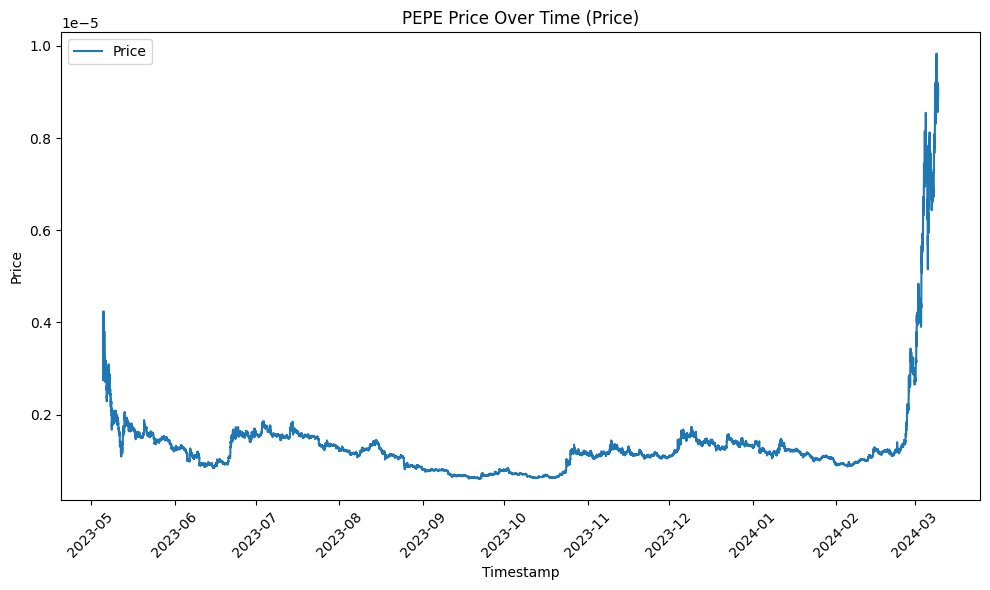

In [36]:
pepe_df = tokens_df[tokens_df['token_symbol'] == 'PEPE']

plt.figure(figsize=(10, 6))
plt.plot(pepe_df['timestamp'], pepe_df['open_price'], label='Price')
plt.title('PEPE Price Over Time (Price)')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("pepe.png")

# Распределение количество свечей по токенам

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_split_block_number = 18316744 # 18716744 # 18316744 # Oct-10-2023
test_split_block_number = 18716744 # Dec-05-2023

def split_dataset(X, y):    
    X_train = X[X['open_block_number'] <= train_split_block_number]
    X_train = X_train.drop('open_block_number', axis=1)
    y_train = y[y['open_block_number'] <= train_split_block_number]['target']
    
    X_validation = X[(X['open_block_number'] > train_split_block_number) & ((X['open_block_number'] <= test_split_block_number))]
    X_validation = X_validation.drop('open_block_number', axis=1)
    y_validation = y[(y['open_block_number'] > train_split_block_number) & (y['open_block_number']  <= test_split_block_number)]['target']
    
    X_test = X[X['open_block_number'] > test_split_block_number]
    X_test = X_test.drop('open_block_number', axis=1)
    y_test = y[y['open_block_number'] > test_split_block_number]['target']

    return X_train, y_train, X_validation, y_validation, X_test, y_test

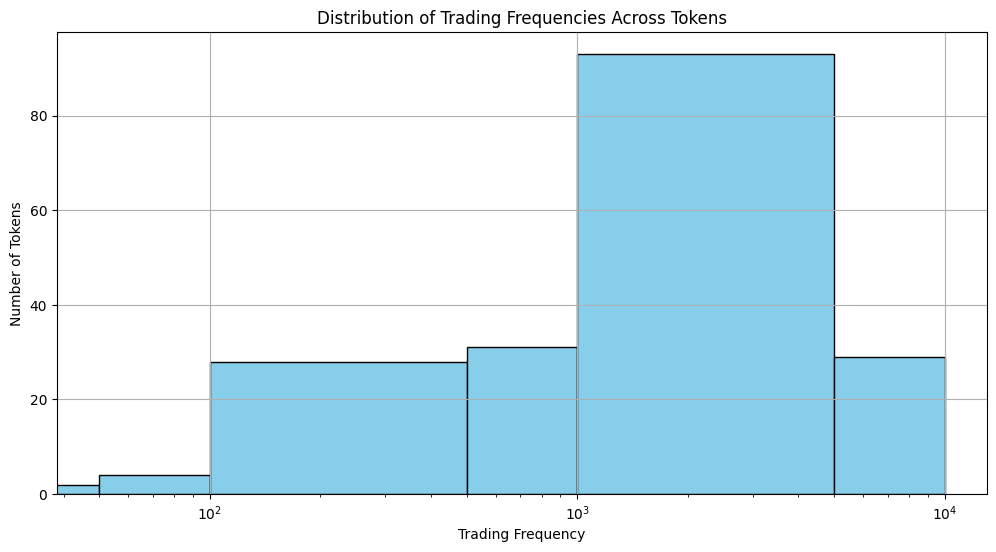

In [38]:
trading_frequency = tokens_df[tokens_df['open_block_number'] < train_split_block_number].groupby('token_address')['open_block_number'].count().reset_index(name='count_train')

plt.figure(figsize=(12, 6))
plt.hist(trading_frequency['count_train'], bins=[0, 50, 100, 500, 1000, 5000, 10000], color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Trading Frequencies Across Tokens')
plt.xlabel('Trading Frequency')
plt.ylabel('Number of Tokens')
plt.grid(True)
plt.savefig("distr.png")

In [39]:
trading_frequency.shape

(199, 2)

In [40]:
test_trading_frequency = tokens_df[tokens_df['open_block_number'] > train_split_block_number].groupby('token_address')['open_block_number'].count().reset_index(name='count_test')

trading_frequency = pd.merge(trading_frequency, test_trading_frequency, on=['token_address'], how='inner')

top_traded_tokens = trading_frequency[
    (trading_frequency['count_test'] + trading_frequency['count_train'] > 8000)
    # (trading_frequency['count_test'] < trading_frequency['count_train'])
]

top_traded_tokens.shape

(44, 3)

In [41]:
tokens_df = tokens_df[tokens_df['token_address'].isin(top_traded_tokens['token_address'])]

# Подготовка таргета

In [42]:
def determine_target(x):
    threshold = 0.325
    
    if x < -threshold:
        return -1
    elif x > threshold:
        return 1
    else:
        return 0

tokens_df['fut_ret'] = (tokens_df['k_target_price'] / tokens_df['k_close'] - 1) / tokens_df['k_std_price_changes_3d']
tokens_df['target'] = tokens_df['fut_ret'].apply(determine_target)
tokens_df['target'].value_counts()

target
 0    209059
 1    205255
-1    202873
Name: count, dtype: int64

In [43]:
tokens_df.to_csv('candles.csv')

# Аналитика

In [44]:
columns = [
    'norm_price_change_candle',
    'norm_volume',
    'norm_buys_usd',
    'norm_buys_count',
    
    'norm_price_change_6h',
    'norm_lh_price_change_6h',
    'norm_volume_6h',
    'norm_buys_usd_6h',
    'norm_buys_count_6h',
    
    'norm_price_change_1d',
    'norm_lh_price_change_1d',
    'norm_volume_1d',
    'norm_buys_usd_1d',
    'norm_buys_count_1d',
    
    'norm_price_change_3d',
    'norm_lh_price_change_3d',
    'norm_volume_3d',
    'norm_buys_usd_3d',
    'norm_buys_count_3d',
    
    'eth_norm_price_change_6h',
    'eth_norm_price_change_candle',
    'eth_norm_volume_6h',
    
    'network_load',
    
    'dom_ratio',
    
    
    'k_norm_price_change_candle',
    'k_norm_volume',
    'k_norm_buys_usd',
    'k_norm_buys_count',
    
    'k_norm_price_change_6h',
    'k_norm_lh_price_change_6h',
    'k_norm_volume_6h',
    'k_norm_buys_usd_6h',
    'k_norm_buys_count_6h',
    
    'k_norm_price_change_1d',
    'k_norm_lh_price_change_1d',
    'k_norm_volume_1d',
    'k_norm_buys_usd_1d',
    'k_norm_buys_count_1d',
    
    'k_norm_price_change_3d',
    'k_norm_lh_price_change_3d',
    'k_norm_volume_3d',
    'k_norm_buys_usd_3d',
    'k_norm_buys_count_3d',

    'uni_kucoin_spread',
]

X = tokens_df[['open_block_number'] + columns]
y = tokens_df[['open_block_number', 'target']]

X_train, y_train, X_validation, y_validation, _, _ = split_dataset(X, y)

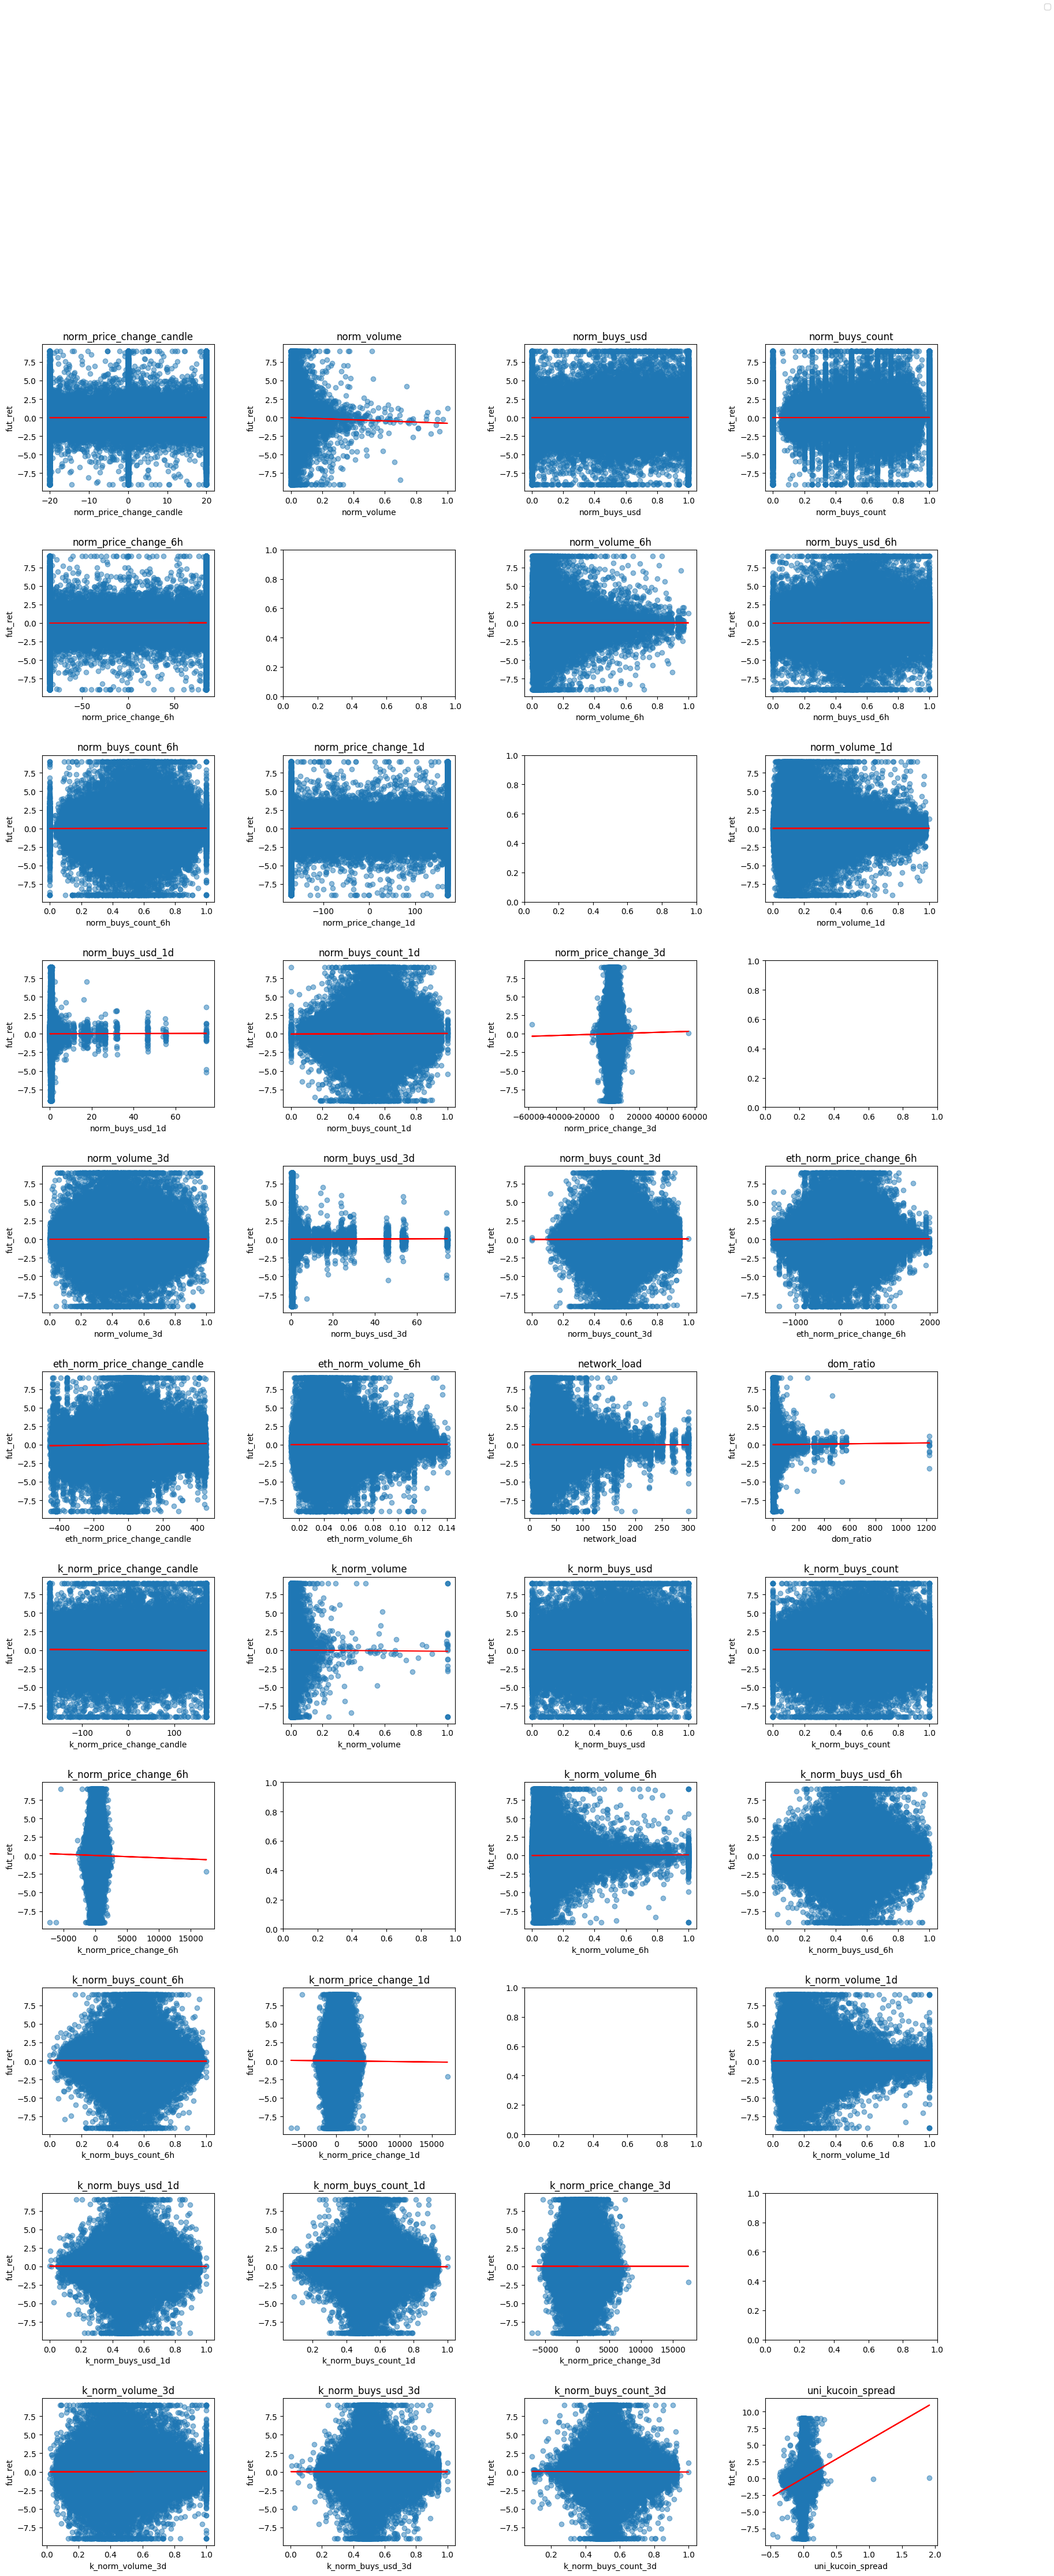

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

f = tokens_df.copy()

clipping_rules = {
    'fut_ret': (-9, 9),
    'norm_price_change_candle': (-20, 20),
    'norm_price_change_6h': (-85, 85),
    'norm_price_change_1d': (-170, 170),
    'norm_buys_usd_6h': (0, 1),
    'norm_buys_usd': (0, 1),
    'network_load': (None, 300),
    'k_norm_price_change_candle': (-170, 170),
    'k_norm_lh_price_change_6h': (None, 7500),
    'k_norm_lh_price_change_1d': (None, 10000),
    'k_norm_lh_price_change_3d': (None, 12000),
}

for column, (lower, upper) in clipping_rules.items():
    if lower is not None and upper is not None:
        f[column] = f[column].clip(lower=lower, upper=upper)
    elif lower is not None:
        f[column] = f[column].clip(lower=lower)
    elif upper is not None:
        f[column] = f[column].clip(upper=upper)

f.dropna(inplace=True)

n_features = len(columns)
n_cols = 4
n_rows = n_features // n_cols + (1 if n_features % n_cols else 0)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4.5 * n_rows))

model = LinearRegression()

axs_flat = axs.flatten()

for i, feature in enumerate(columns):
    X = f[[feature]].values.reshape(-1, 1)
    y = f['fut_ret'].values

    model.fit(X, y)
    predictions = model.predict(X)

    ax = axs_flat[i]
    ax.scatter(X, y, alpha=0.5)
    ax.plot(X, predictions, color='red')
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('fut_ret')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines[:2], labels[:2], loc='upper right')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

for ax in axs_flat[i+1:]:
    ax.set_visible(False)

plt.show()

[9.67279577]
-4.6473035040926245


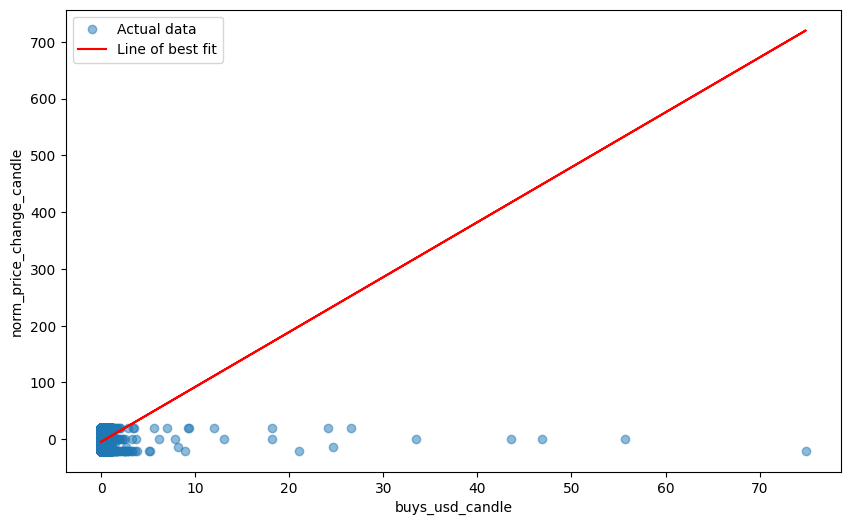

In [46]:
X = f[['norm_buys_usd']]
y = f['norm_price_change_candle']

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

print(model.coef_)
print(model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual data')
plt.plot(X, predictions, color='red', label='Line of best fit')
plt.xlabel('buys_usd_candle')
plt.ylabel('norm_price_change_candle')
plt.legend()
plt.show()

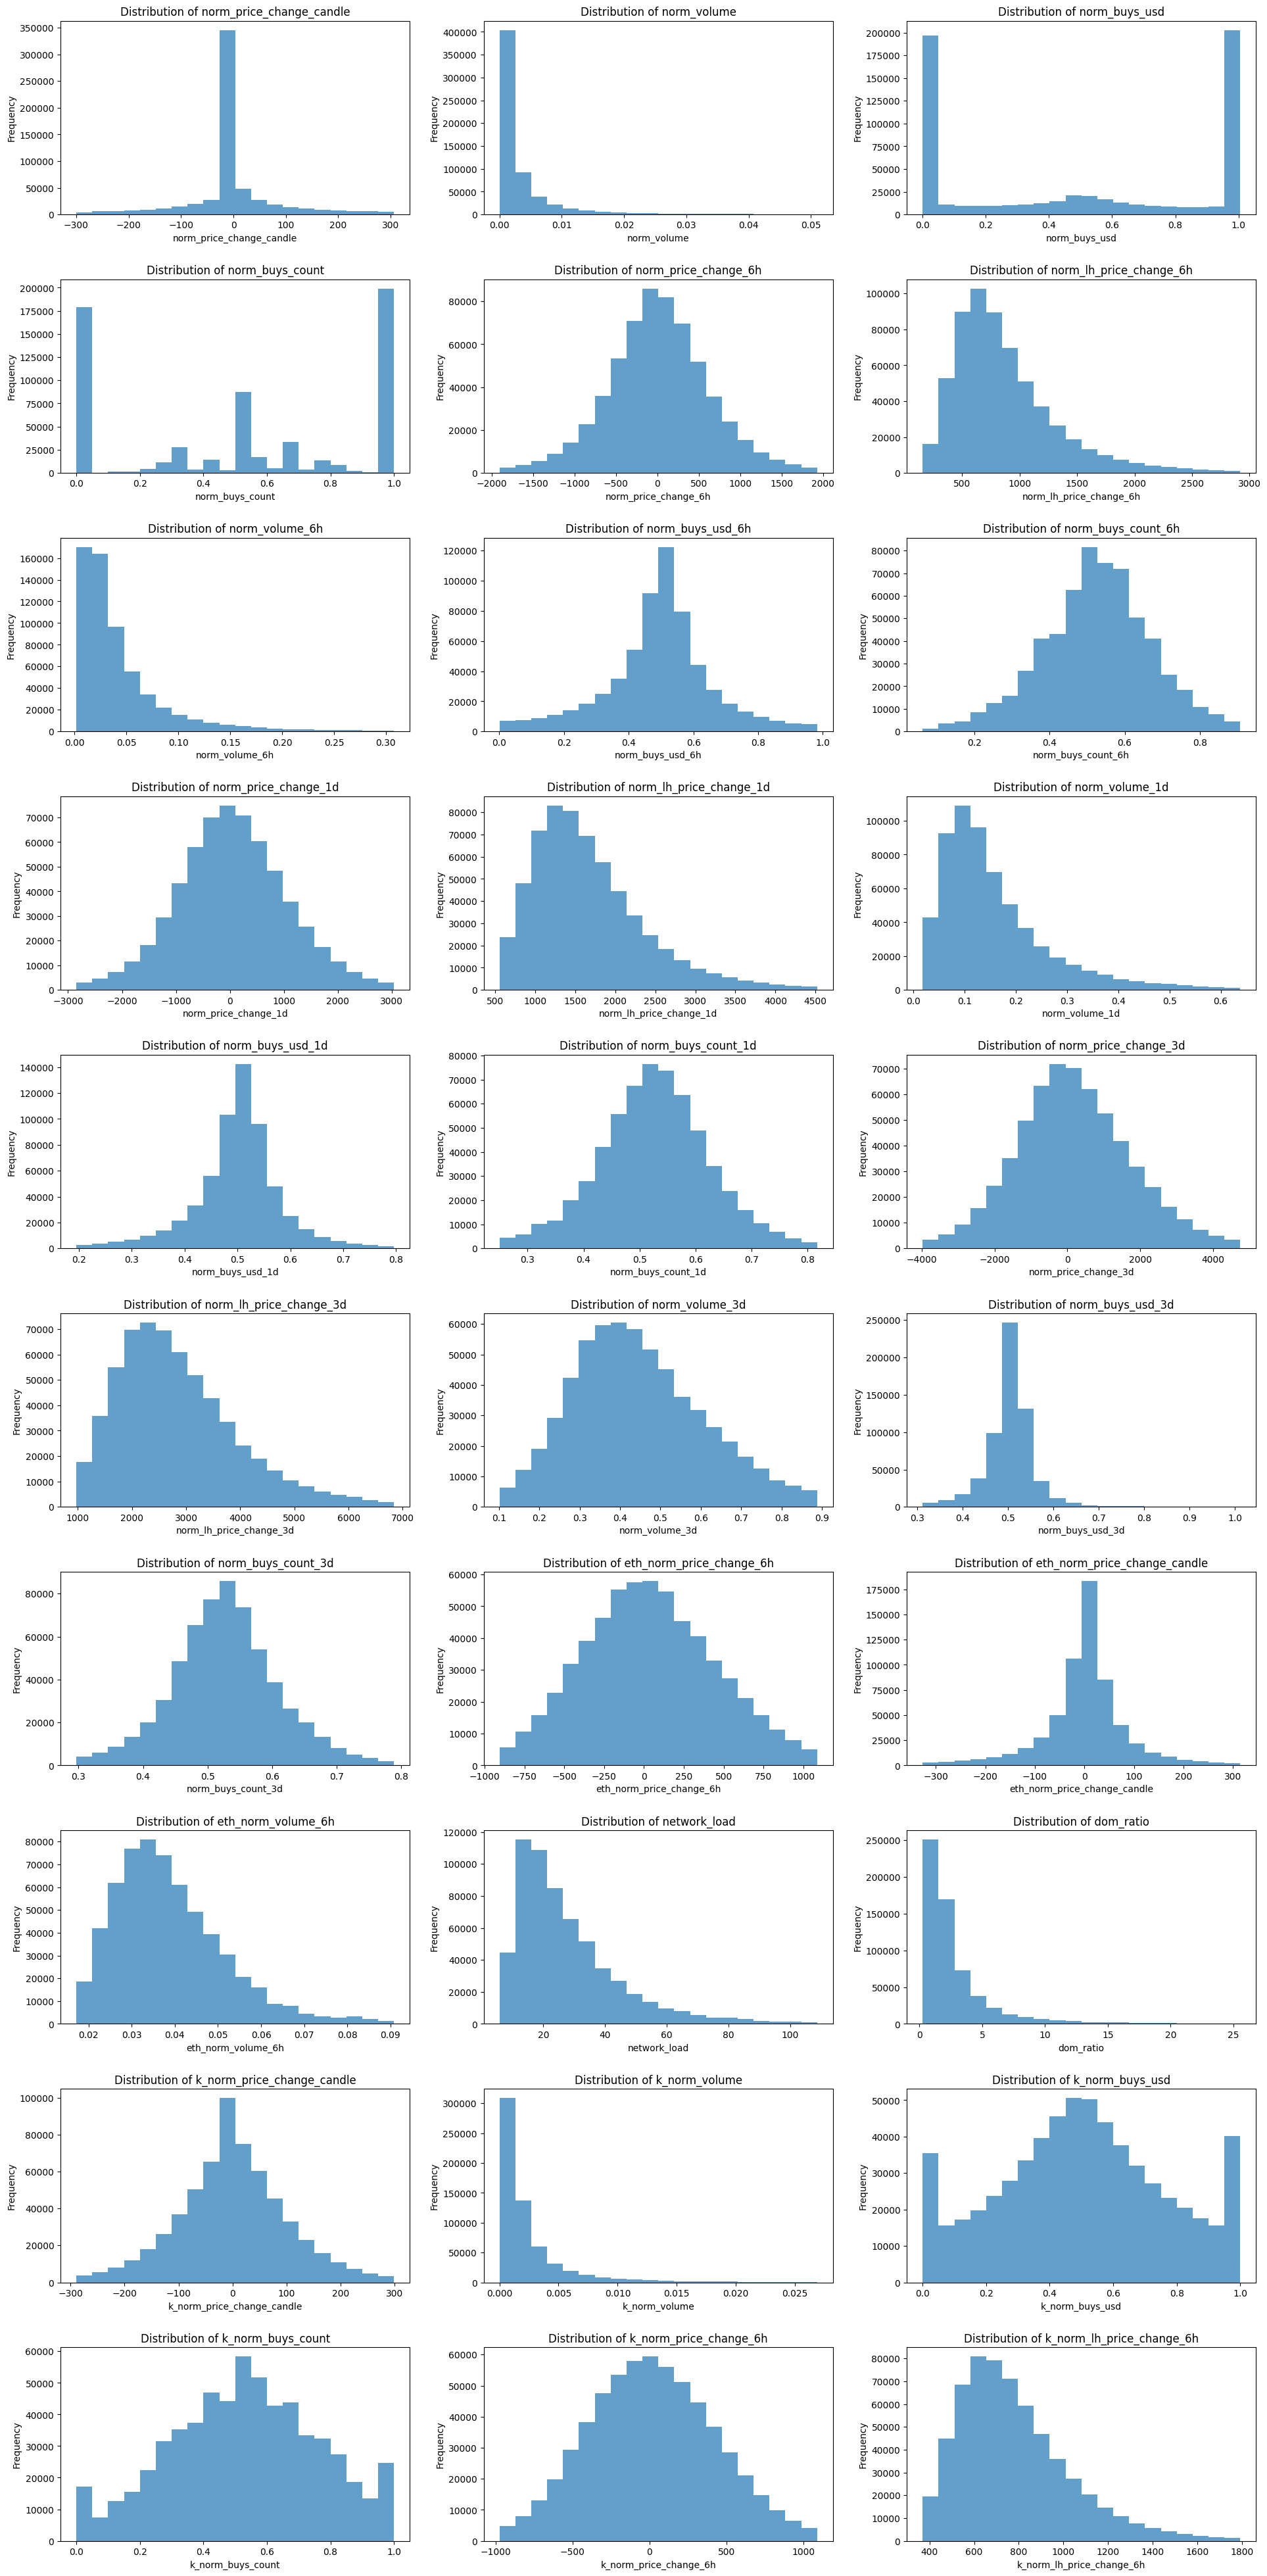

In [51]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
fig.tight_layout(pad=5.0)

for ax, column in zip(axes.flatten(), columns):
    lower_bound, upper_bound = np.percentile(tokens_df[column].dropna(), [1, 99])

    tokens_df[column].plot(kind='hist', bins=20, alpha=0.7, ax=ax, range=(lower_bound, upper_bound))
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

for i in range(len(columns), 10*3):
    fig.axes[i].set_visible(False)

plt.show()

In [47]:
for i in range(4, 13):
    print(i, tokens_df[tokens_df['fut_ret'].abs() > i].shape[0] / tokens_df.shape[0])

4 0.010628869370223287
5 0.005591498200707403
6 0.003255091244630882
7 0.002104710565841471
8 0.001443646739156852
9 0.001020760320615956
10 0.0007744816400863919
11 0.000607595428938069
12 0.0004974181244906326


In [48]:
grouped = tokens_df.groupby('token_symbol')

ts = {}

for name, group in grouped:    
    # ratio = group['volume'].sum() / group['k_volume'].sum()

    # print(f'{name}: {ratio}')

    ts[group['token_address'].iloc[0]] = name

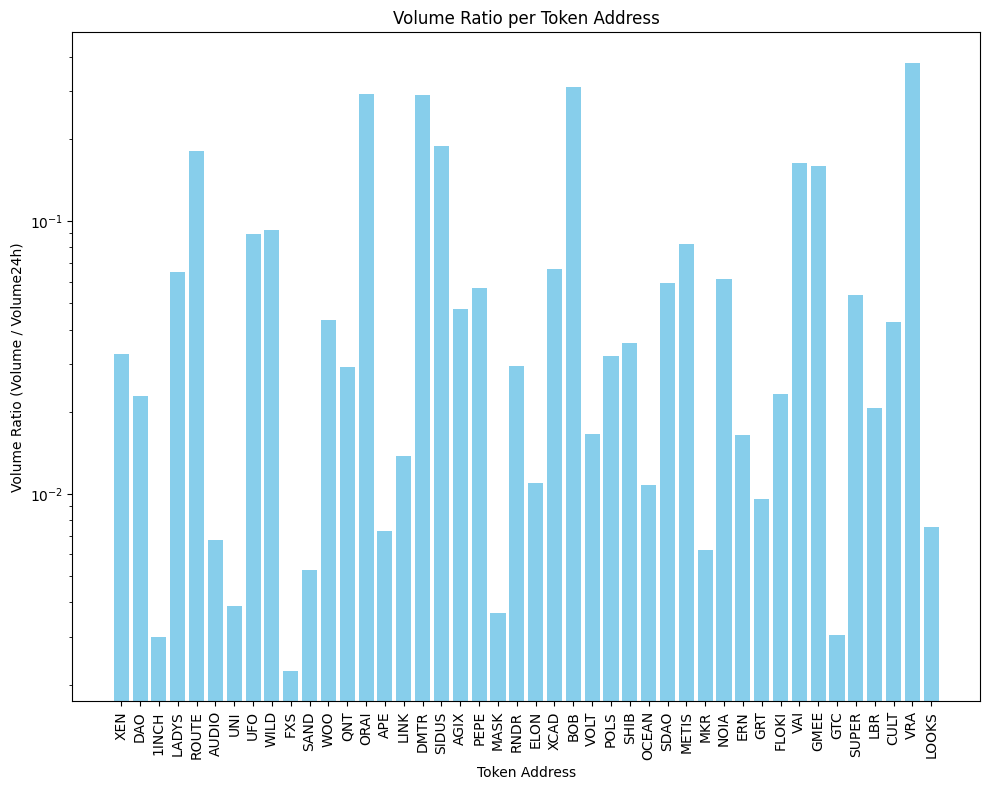

In [49]:
relevant_cmc_df = cmc_df[(cmc_df['platform_slug'] == 'ethereum')].copy()
relevant_cmc_df = relevant_cmc_df[['symbol', 'token_adress', 'volume24h']].groupby(['token_adress'])['volume24h'].sum().reset_index()

df = tokens_df

df_volume = df[(df['open_block_number'] >= 17606479) & (df['open_block_number'] <= 19006479)]
df_volume = df_volume[['k_volume', 'token_address']].copy()
df_volume = df_volume.groupby(['token_address'])['k_volume'].sum().reset_index()

relevant_cmc_df = pd.merge(relevant_cmc_df, df_volume[['token_address', 'k_volume']], left_on='token_adress', right_on='token_address', how='left')
relevant_cmc_df = relevant_cmc_df.dropna()
# relevant_cmc_df = relevant_cmc_df[(abs(relevant_cmc_df['volume24h'] - relevant_cmc_df['volume']) / relevant_cmc_df['volume']) <= 20]

relevant_cmc_df['volume_ratio'] = relevant_cmc_df['k_volume'] / relevant_cmc_df['volume24h']

def fnc(a):
    return ts[a]

relevant_cmc_df['symbol'] = relevant_cmc_df['token_address'].apply(fnc)

# Plot
plt.figure(figsize=(10, 8))
plt.yscale('log') 
plt.bar(relevant_cmc_df['symbol'], relevant_cmc_df['volume_ratio'], color='skyblue')
plt.xlabel('Token Address')
plt.ylabel('Volume Ratio (Volume / Volume24h)')
plt.xticks(rotation=90)
plt.title('Volume Ratio per Token Address')
plt.tight_layout()
plt.show()